<a href="https://colab.research.google.com/github/ale29ruf/Progetto_Data_Mining/blob/main/ProgettoACI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Parte in cui descriviamo il dataset, le features e il loro significato, il numero di istanze.

Il obiettivo in termini predittivi è determinare se una persona guadagna oltre $50K all'anno.

Come prima operazione importiamo il dataset.

In [155]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving adult.csv to adult (1).csv


In [156]:
# Supponiamo che il file caricato si chiami 'nomeFile.csv' (controllare nella sezione File a sinistra)
data = pd.read_csv('adult.csv')

Al fine di valutare la qualità del dataset, si è fatto uso di due metodi molto generali: "describe()" e "info()". Il primo fornisce una sintesi statistica del dataset, il secondo invece fornisce informazioni sulla tipologia di dati che costituisce il datase, utile per individuare la presenza di valori mancanti.

In [157]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [158]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


E' possibile osservare che nessuna istanza contiene valori di feature nulli.

## Data Cleaning and Preparation

In questa sezione eseguiremo alcune operazioni preliminarie ma molto significative, quali cleaning, trasformazioni e altro, se necessarie, in modo da rendere il dataset significativo per l'esecuzione dei modelli.

### Gestire dati mancanti

In [160]:
nulls = data.isnull()
nulls.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561


Sembra non esserci alcun dato mancante quindi possiamo saltare la parte di filtraggio delle corrispettive istanze.

### Rimozione di istanze duplicate

Ci sono svariati motivi per cui un dataset possa contenere duplicati, ad esempio se è ottenuto attraverso il marging di più dataset.   
A tal proposito si fa uso del metodo "duplicated()" di Pandas che restituisce true per un'istanza se è un duplicato di un'altra istanza, cioè se esiste un'altra istanza con diverso indice tale per cui ogni valore per colonna risulta essere uguale.

In [161]:
duplicated = data.duplicated() # return a mask
duplicated.describe()

# Visualizzo eventualmente le istanze duplicate
#duplicate_rows = data[duplicated]
#print(duplicate_rows)

count     32561
unique        2
top       False
freq      32537
dtype: object

Notiamo che 32537/32561 istanze hanno valore False, ciò significa che 24 istanze sono duplicate. Procediamo con la rimozione di queste.

In [162]:
new_data = data.drop_duplicates()
duplicated = new_data.duplicated()
duplicated.describe()

count     32537
unique        1
top       False
freq      32537
dtype: object

Notiamo che a questo punto ogni istanza ha valore a True.

#### Trasformazione del dataset

Ci vogliamo assicurare che i valori delle feature categoriche siano effettivamente quelli presenti nelle varie istanze, evitando situazioni di inconsistenza dovute a lettere minuscole o maiuscole, spazi o altro.   
Ovviamente come riferimento si considerano le informazioni fornite da coloro che hanno caricato il dataset.  
Si visualizza in prima battuta tutte le distribuzioni delle feature categoriche.

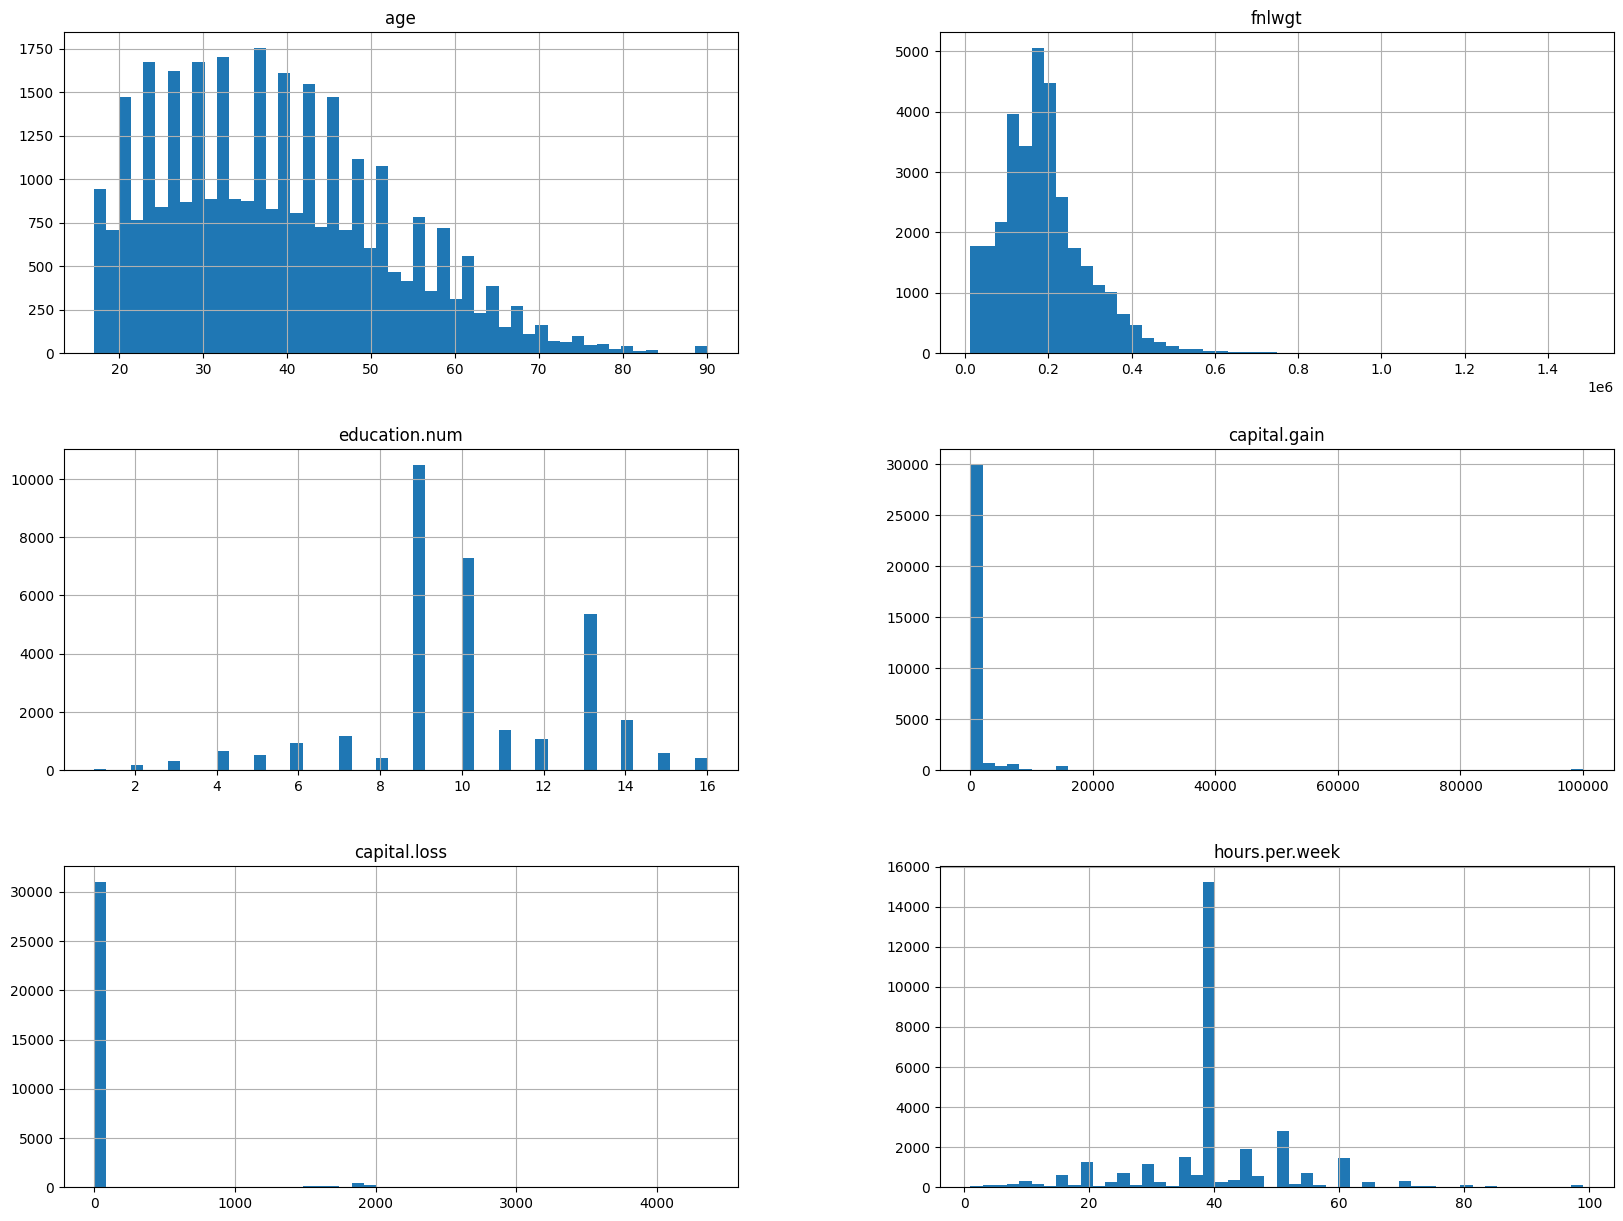

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
new_data.hist(bins=50, figsize=(20,15))
plt.show()

La featuer "fnlwgt" è da considerarsi come un peso relativo alla significatività dell'istanza nei confronti della variabile target.
Non sembra esserci alcun valore anomalo. <br>
Sarebbe interessante capire:
1.   le persone quasi novantenni che lavorano
2.   le persone che lavorano quasi 100 ore a settimana

### Analisi delle persone over age che lavorano
Se "final weight" misura effettivamente il peso dell'istanza nei confronti di "income", verifichiamo a cosa corrispondono le istanze che hanno un valore di fnlwgt maggiore di 1.

In [164]:
tmp = new_data[new_data['fnlwgt']/1000000>1]
tmp.count()

age               13
workclass         13
fnlwgt            13
education         13
education.num     13
marital.status    13
occupation        13
relationship      13
race              13
sex               13
capital.gain      13
capital.loss      13
hours.per.week    13
native.country    13
income            13
dtype: int64

In [165]:
new_data = new_data[new_data['fnlwgt']/1000000<=1]

Dato che sono solo 13, si è deciso di rimuoverle. <br>
A questo punto consideriamo le persone over age che lavorano. Attualmente l'età media di ritiro dalla vita lavorativa è di 64 anni per gli uomini e di 62 anni per le donne. <br>
E' bene verificare prima alcune cose:
1. La variabile "age" influenza molto la variabile target?
2. Quanto vale il corrispettivo fnlwgt per le tuple che si vuole eliminare?
3. La distribuzione della variabile target risente di uno sbilanciamento?

E' importante sapere che **'fnlwgt' è un peso statistico** **assegnato a ciascuna istanza in un dataset demografico per garantire che il campione estratto rappresenti accuratamente la popolazione di interesse**. Questo peso è calcolato utilizzando metodi avanzati di campionamento e stratificazione per garantire che l'analisi dei dati rifletta in modo equo la diversità della popolazione.

In [166]:
# Per l'analisi di correlazione eseguo prima la codifica one hot almeno sulla variabile target
one_hot_income = pd.get_dummies(new_data['income'])
new_data = pd.concat([new_data, one_hot_income], axis=1)
#new_data = new_data.drop('income', axis=1)
new_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,<=50K,>50K
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,True,False
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,True,False
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,True,False
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,True,False
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,True,False


In [167]:
corr_matrix = new_data.corr(numeric_only=True)
corr_matrix["<=50K"].sort_values()

>50K             -1.000000
education.num    -0.335166
age              -0.234051
hours.per.week   -0.229543
capital.gain     -0.223319
capital.loss     -0.150529
fnlwgt            0.009432
<=50K             1.000000
Name: <=50K, dtype: float64

In [168]:
corr_matrix[">50K"].sort_values()

<=50K            -1.000000
fnlwgt           -0.009432
capital.loss      0.150529
capital.gain      0.223319
hours.per.week    0.229543
age               0.234051
education.num     0.335166
>50K              1.000000
Name: >50K, dtype: float64

Sicuramente la feature "age" ha una buona correlazione nello spiegare la variabile target, se paragonata alle altre. Valutiamo il valore di "fnlwgt" medio per capire se le istanze sono molto rappresentative della popolazione statistica.

In [169]:
filtered_data = new_data[new_data['age'] > 80]
filtered_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,85.857143,164142.897959,9.306122,1104.744898,177.091837,29.500000
std,3.895543,85082.897239,3.462340,3866.306691,745.408600,18.387159
min,81.000000,29441.000000,2.000000,0.000000,0.000000,1.000000
25%,82.000000,99127.000000,9.000000,0.000000,0.000000,15.000000
50%,85.000000,151030.000000,9.000000,0.000000,0.000000,30.000000
75%,90.000000,212066.250000,13.000000,0.000000,0.000000,40.000000
max,90.000000,403910.000000,15.000000,20051.000000,4356.000000,99.000000


Sembra che tutto sommato non sono poi così poco rilvenati dato che solo 98 tuple rappresentano mediamente il 16% della popolazione, considerando anche che l'intero campione è composto da 32524 istanze che dovrebbe rappresentare il restante 84%. <br>
Consideriamo invece come varia la variabile target nel caso in cui decidessimo di rimuovere queste tuple.

In [170]:
filtered_data = new_data[new_data['age'] < 80]

new_data_freq = new_data[['<=50K', '>50K']].sum()
filtered_data_freq = filtered_data[['<=50K', '>50K']].sum()
print()
print("new_data:")
print("<=50K: ", new_data_freq['<=50K']/(new_data_freq['<=50K']+new_data_freq['>50K']))
print(">50K: ", new_data_freq['>50K']/(new_data_freq['<=50K']+new_data_freq['>50K']))
print()
print("filtered_data:")
print("<=50K: ", filtered_data_freq['<=50K']/(filtered_data_freq['<=50K']+filtered_data_freq['>50K']))
print(">50K: ", filtered_data_freq['>50K']/(filtered_data_freq['<=50K']+filtered_data_freq['>50K']))


new_data:
<=50K:  0.7590702250645677
>50K:  0.2409297749354323

filtered_data:
<=50K:  0.7586717689174176
>50K:  0.2413282310825824


Le distribuzioni rimarrebbero abbastanza inalterate. <br>
In questa prima fase esplorativa si è deciso comunque di mantenere le tuple all'interno del dataset.

### Analisi delle persone che lavorano troppe ore a settimana
L'obiettivo in questo caso è identificare le persone che lavorano troppe ore a settimana ed eventualemente considerarle come outlayer, e dunque rimuoverle. <br>
In media si lavora 40 ore a settimana, e questo dato torna nella distribuzione della feature, tuttavia vogliamo essere certi di non star includendo degli outlayer nel dataset. Già con 80 ore settimanali, se si considerano lavorativi anche il Sabato e la Domenica, si arriva a circa 11 ore al giorno.

In [171]:
filtered_data = new_data[new_data['hours.per.week']>80]
filtered_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,41.721154,164698.163462,9.971154,629.716346,122.201923,92.543269
std,12.115752,104270.797412,2.966664,2416.850640,499.855010,6.556190
min,19.000000,20109.000000,2.000000,0.000000,0.000000,81.000000
25%,33.000000,81310.000000,9.000000,0.000000,0.000000,85.000000
50%,40.000000,160979.500000,9.000000,0.000000,0.000000,95.000000
75%,50.000000,221401.500000,12.000000,0.000000,0.000000,99.000000
max,90.000000,511289.000000,16.000000,15024.000000,2559.000000,99.000000


Si noti come il nuemro di istanze in questo caso è 208, tuttavia il valore medio di "fnlwgt" è di circa il 16% ! Verifichiamo com'è correlata la variabile con quelle target e se le distribuzioni di queste cambiano di molto nel caso in cui le rimuovessimo.

In [172]:
corr_matrix = new_data.corr(numeric_only=True)
corr_matrix["<=50K"].sort_values()

>50K             -1.000000
education.num    -0.335166
age              -0.234051
hours.per.week   -0.229543
capital.gain     -0.223319
capital.loss     -0.150529
fnlwgt            0.009432
<=50K             1.000000
Name: <=50K, dtype: float64

In [173]:
corr_matrix[">50K"].sort_values()

<=50K            -1.000000
fnlwgt           -0.009432
capital.loss      0.150529
capital.gain      0.223319
hours.per.week    0.229543
age               0.234051
education.num     0.335166
>50K              1.000000
Name: >50K, dtype: float64

Effettivamente la correlazione è buona! <br>
Rivalutiamo la variazione delle variabili target.

In [174]:
filtered_data = new_data[new_data['hours.per.week']<=80]

new_data_freq = new_data[['<=50K', '>50K']].sum()
filtered_data_freq = filtered_data[['<=50K', '>50K']].sum()
print()
print("new_data:")
print("<=50K: ", new_data_freq['<=50K']/(new_data_freq['<=50K']+new_data_freq['>50K']))
print(">50K: ", new_data_freq['>50K']/(new_data_freq['<=50K']+new_data_freq['>50K']))
print()
print("filtered_data:")
print("<=50K: ", filtered_data_freq['<=50K']/(filtered_data_freq['<=50K']+filtered_data_freq['>50K']))
print(">50K: ", filtered_data_freq['>50K']/(filtered_data_freq['<=50K']+filtered_data_freq['>50K']))


new_data:
<=50K:  0.7590702250645677
>50K:  0.2409297749354323

filtered_data:
<=50K:  0.7594689936873376
>50K:  0.24053100631266247


Sembra non alterare affatto la distribuzione. <br>
Tutto sommato è meglio tenerla almeno in questa prima fase di analisi esplorativa.

## Analisi feature categoriche

In [175]:
import plotly.express as px

def plot_categorical_distributions_plotly(df, categorical_columns):
    for col in categorical_columns:
        value_counts = df[col].value_counts().reset_index()
        value_counts.columns = ['Categoria', 'Frequenza']  # Rinomina le colonne

        fig = px.bar(value_counts, x='Categoria', y='Frequenza', title=f'Distribuzione di {col}')
        fig.update_layout(xaxis_title='Categoria', yaxis_title='Frequenza')
        fig.show()

# Selezione di tutte le colonne categoriche
feature_categoriche = new_data.select_dtypes(include=['object'])
plot_categorical_distributions_plotly(new_data, feature_categoriche)

E' sicuramente evidente come dalle Filippine in poi sia meglio inserire tutti i paesi sotto un'unica categoria: "others".

In [176]:
countries_to_keep = ['United-States', 'Mexico', '?']
new_data.loc[~new_data['native.country'].isin(countries_to_keep), 'native.country'] = 'others'

Si può osservare come il carattere speciale "?" venga usato per indicare un valore mancante. Visualizziamo il numero di tuple contenente questo carattere.

In [177]:
# Genero la maschera
contains_question = new_data.applymap(lambda x: x == "?")

# Conto il numero di righe che contengono almeno un "?"
num_tuples_with_question_mark = contains_question.any(axis=1).sum()

print(num_tuples_with_question_mark)

2398


A questo punto è possibile o procedere con la rimozione delle istanze oppure con la sostituzione dei valori "?". Dal momento che il numero di istanze è relativamente basso, si è deciso di rimuoverle dal dataset.

In [178]:
cleaned_data = new_data[~contains_question.any(axis=1)]

contains_question = cleaned_data.applymap(lambda x: x == "?")
num_tuples_with_question_mark = contains_question.any(axis=1).sum()

new_data = cleaned_data

print(num_tuples_with_question_mark)

0


Consideriamo le feature "education" e "education.num".

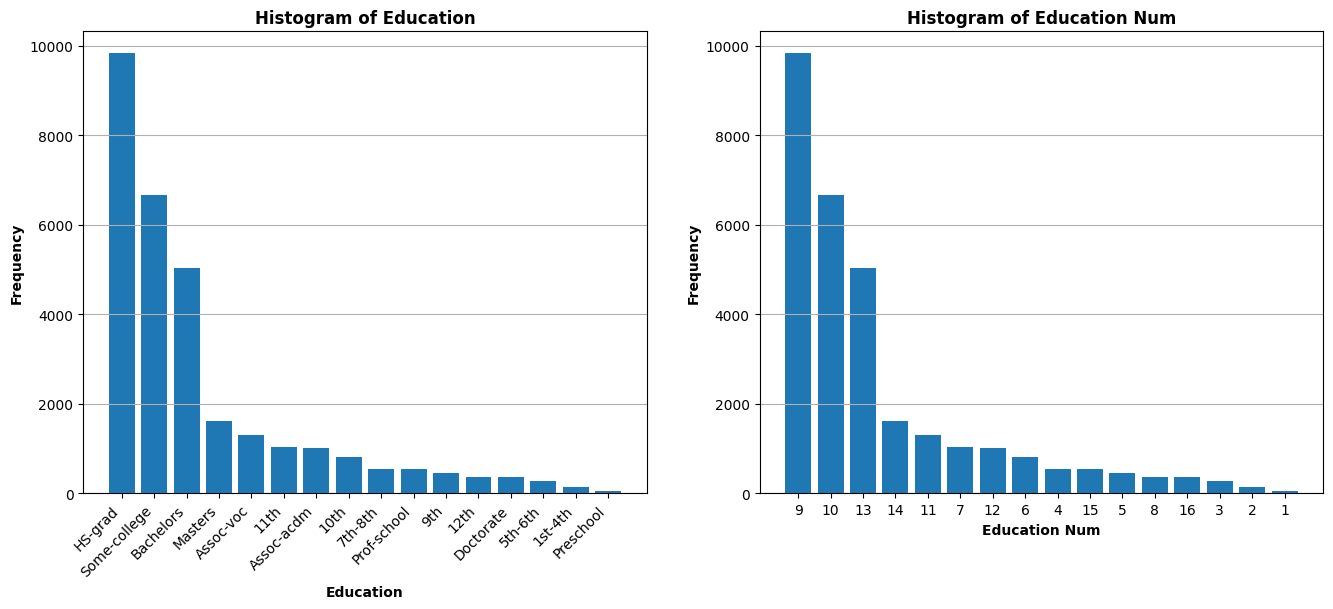

In [179]:
education_counts = new_data['education'].value_counts().sort_values(ascending=False)
education_num_counts = new_data['education.num'].value_counts().sort_values(ascending=False)
education_num_counts.index = education_num_counts.index.astype(str)

plt.figure(figsize=(16, 6))

# Istogramma per education
plt.subplot(1, 2, 1)
plt.bar(education_counts.index, education_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Education', fontweight='bold')
plt.grid(axis='y')

# Visualizzazione dell'istogramma di education.num
plt.subplot(1, 2, 2)
plt.bar(education_num_counts.index, education_num_counts.values)
plt.xlabel('Education Num', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Education Num', fontweight='bold')
plt.grid(axis='y')

plt.show()

Notiamo che hanno praticamente la stessa distribuzione. Dato che una variabile numerica è più facile da gestire si è preferito rimuovere la feature "Education".

In [180]:
new_data.drop(columns=['education'], inplace=True)
new_data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,<=50K,>50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,True,False
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,True,False
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,True,False
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,True,False
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,True,False


Valutiamo se considerare la variazione di capitale ha più senso di avere le due feature separate.

In [181]:
corr_matrix = new_data.corr(numeric_only=True)
corr_matrix["<=50K"].sort_values()

>50K             -1.000000
education.num    -0.335300
age              -0.242030
hours.per.week   -0.229307
capital.gain     -0.221184
capital.loss     -0.150054
fnlwgt            0.008829
<=50K             1.000000
Name: <=50K, dtype: float64

In [182]:
new_data['capital_variation'] = new_data['capital.gain'] - new_data['capital.loss']/2
corr_matrix = new_data.corr(numeric_only=True)
corr_matrix["<=50K"].sort_values()

>50K                -1.000000
education.num       -0.335300
age                 -0.242030
hours.per.week      -0.229307
capital.gain        -0.221184
capital_variation   -0.216817
capital.loss        -0.150054
fnlwgt               0.008829
<=50K                1.000000
Name: <=50K, dtype: float64

La nuova feature 'capital_variation' ha una correlazione superiore alla correlazione media tra 'capital.gain' e 'capital.loss' (pari a 0.185619)!

In [183]:
new_data.drop(columns=['capital.gain'], inplace=True)
new_data.drop(columns=['capital.loss'], inplace=True)

In [184]:
new_data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,<=50K,>50K,capital_variation
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K,True,False,-2178.0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K,True,False,-1950.0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K,True,False,-1950.0
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K,True,False,-1885.0
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K,True,False,-1885.0


Consideriamo la categoria 'Workclass' come segue.

<Figure size 1400x800 with 0 Axes>

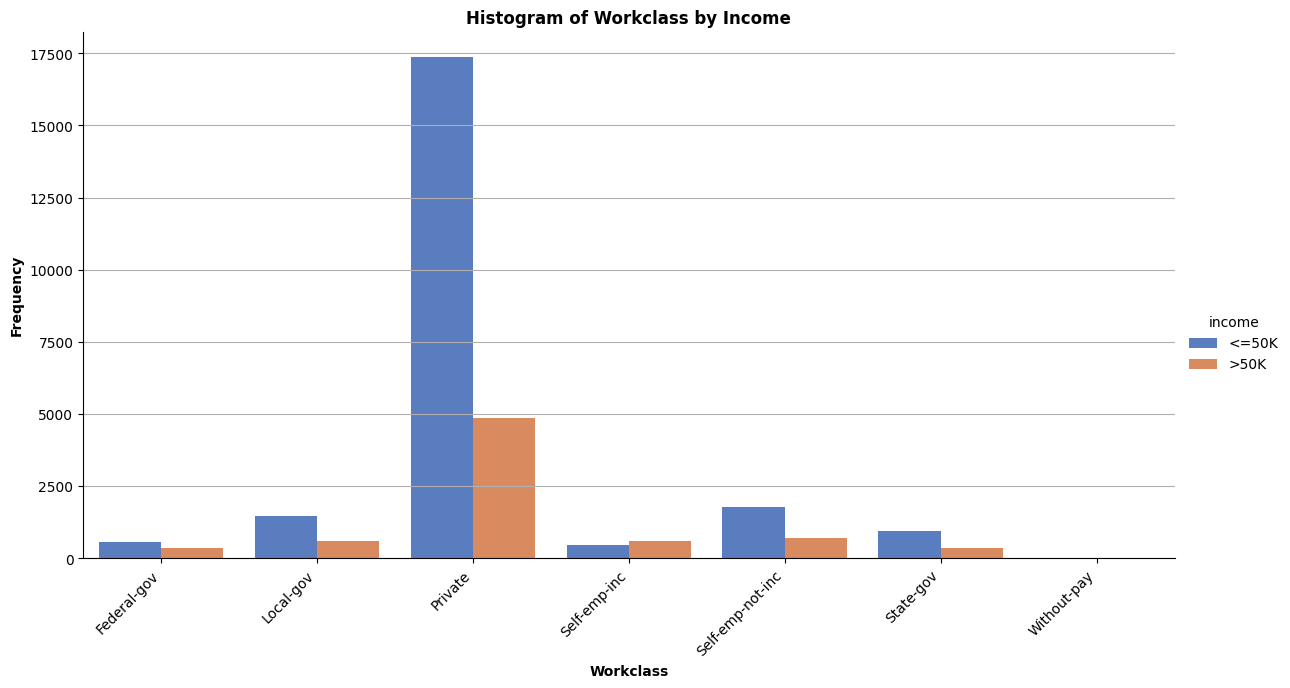

In [213]:
workclass_counts = new_data.groupby(['workclass', 'income']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.catplot(data=workclass_counts, x='workclass', y='count', hue='income', kind='bar', height=6, aspect=2, palette='muted')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Workclass', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Workclass by Income', fontweight='bold')
plt.grid(axis='y')

plt.show()

Prima di unire le classe, dato che non sono più molto scarne come per la feature 'Native.country', è bene visualizzare lo stesso grafico ma normalizzato, in modo da capire come si distribuisce meglio 'income' tra le varie categorie.

<Figure size 1400x800 with 0 Axes>

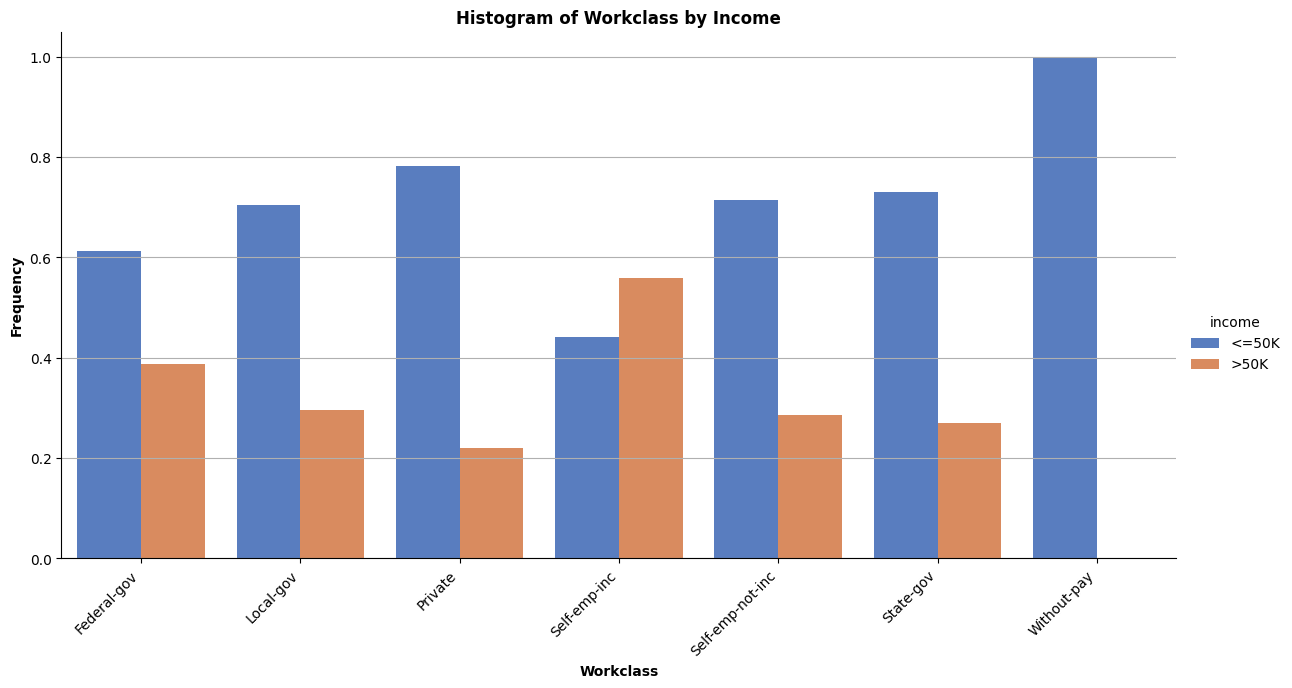

In [229]:
proportional_data = new_data.groupby(['workclass', 'income']).size().reset_index(name='count')
total_counts_per_workclass = proportional_data.groupby('workclass')['count'].transform('sum')
proportional_data['count'] = proportional_data['count'] / total_counts_per_workclass

plt.figure(figsize=(14, 8))
sns.catplot(data=proportional_data, x='workclass', y='count', hue='income', kind='bar', height=6, aspect=2, palette='muted')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Workclass', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Workclass by Income', fontweight='bold')
plt.grid(axis='y')

Può sembrare una buona idea unire 'Local-gov' e 'State-gov' sotto un'unica feature: 'Gov'. Un ragionamento analogo può essere fatto con 'Self-emp-not-inc' e 'Private'. <br>

*Per quanto riguarda 'Without-pay' che conta un numero di istanze pari a 14, si è decido di unire a questi la categoria 'Never-worked' che conta appena tot istanze (evidentemente sono state eliminate dal momento che contenevano '?').*



In [235]:
new_data['workclass'] = new_data['workclass'].replace({'Local-gov': 'Gov', 'State-gov': 'Gov'})
new_data['workclass'] = new_data['workclass'].replace({'Self-emp-not-inc': 'Private'})
print(new_data['workclass'].value_counts())

workclass
Private         24752
Gov              3344
Self-emp-inc     1073
Federal-gov       943
Without-pay        14
Name: count, dtype: int64


Visualizziamo adesso la feature 'marital.status'.

<Figure size 1400x800 with 0 Axes>

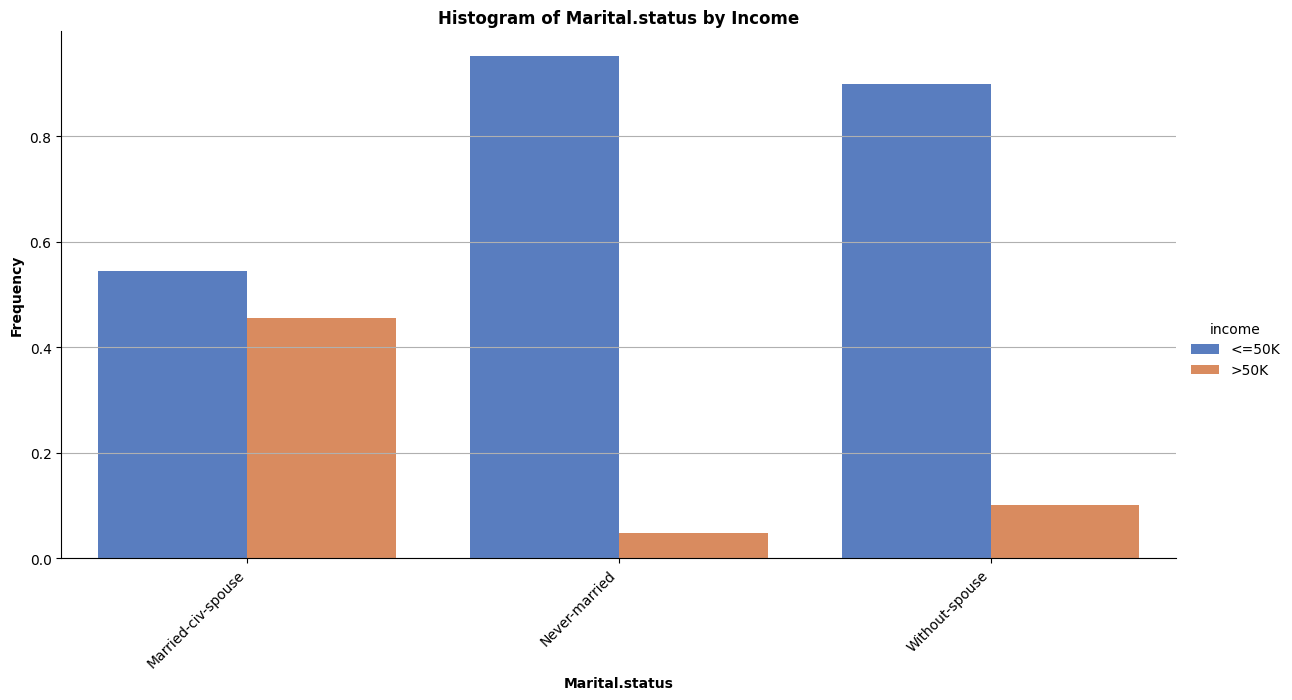

In [244]:
proportional_data = new_data.groupby(['marital.status', 'income']).size().reset_index(name='count')
total_counts = proportional_data.groupby('marital.status')['count'].transform('sum')
proportional_data['count'] = proportional_data['count'] / total_counts

plt.figure(figsize=(14, 8))
sns.catplot(data=proportional_data, x='marital.status', y='count', hue='income', kind='bar', height=6, aspect=2, palette='muted')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Marital.status', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Marital.status by Income', fontweight='bold')
plt.grid(axis='y')

plt.show()

Sembra sensato anche in questo caso unire la categoria 'Divorced', 'Separated', 'Widowed', 'Married-AF-Spouse' e 'Married-spouse-absent' sotto un'unica: 'Without-spouse'.

In [240]:
new_data['marital.status'] = new_data['marital.status'].replace({
    'Divorced': 'Without-spouse',
    'Separated': 'Without-spouse',
    'Widowed': 'Without-spouse',
    'Married-AF-spouse': 'Without-spouse',
    'Married-spouse-absent': 'Without-spouse'
})

print(new_data['marital.status'].value_counts())

marital.status
Married-civ-spouse    14055
Never-married          9708
Without-spouse         6363
Name: count, dtype: int64


Si considera la feature 'relationship'.

<Figure size 1400x800 with 0 Axes>

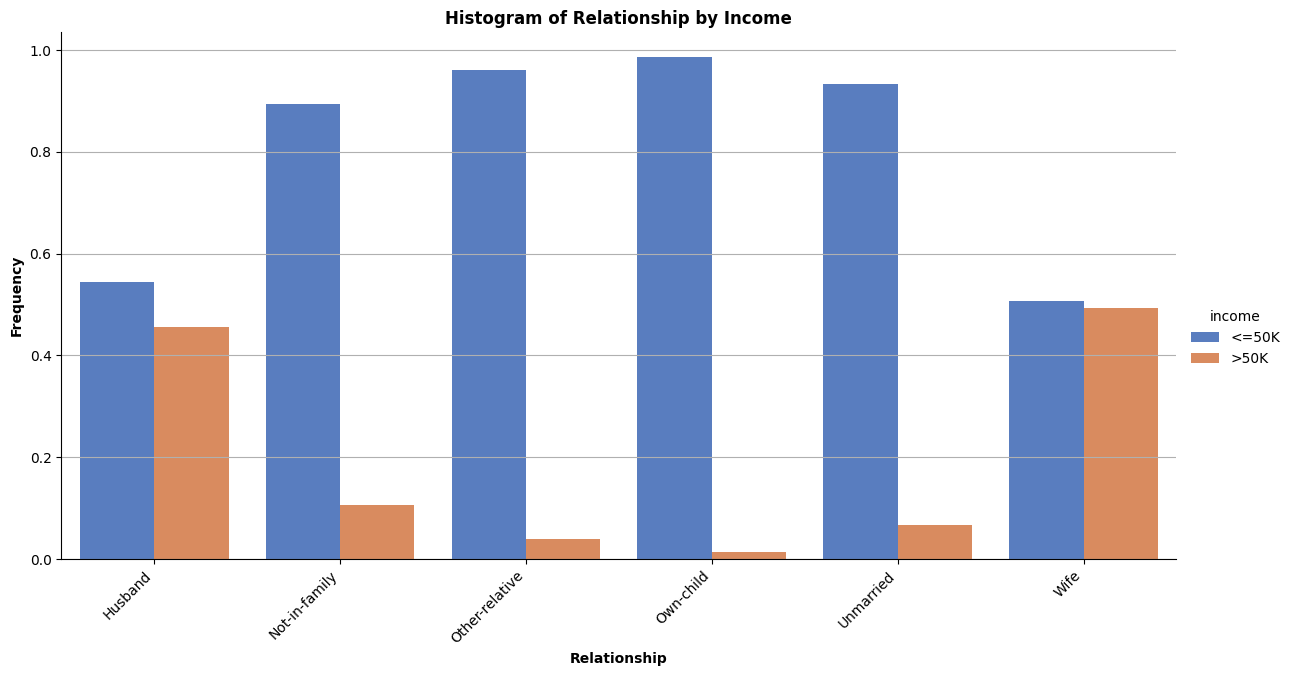

In [245]:
proportional_data = new_data.groupby(['relationship', 'income']).size().reset_index(name='count')
total_counts = proportional_data.groupby('relationship')['count'].transform('sum')
proportional_data['count'] = proportional_data['count'] / total_counts

plt.figure(figsize=(14, 8))
sns.catplot(data=proportional_data, x='relationship', y='count', hue='income', kind='bar', height=6, aspect=2, palette='muted')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Relationship', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Relationship by Income', fontweight='bold')
plt.grid(axis='y')

plt.show()

Anche in questo caso sembra quasi naturale unire sotto un'unica categoria "Not-in-family", "Other-relative", "Own-child" e "Unmarried".

In [247]:
new_data['relationship'] = new_data['relationship'].replace({
    'Not-in-family': 'Other',
    'Other-relative': 'Other',
    'Own-child': 'Other',
    'Unmarried': 'Other'
})

print(new_data['relationship'].value_counts())

relationship
Other      16267
Husband    12453
Wife        1406
Name: count, dtype: int64


Per la feature 'race' si procede allo stesso modo. In questo caso si è deciso di unire 'Amer-Indian-Eskimo' in 'Other' (per lo stesso motivo dei precedenti).

<Figure size 1400x800 with 0 Axes>

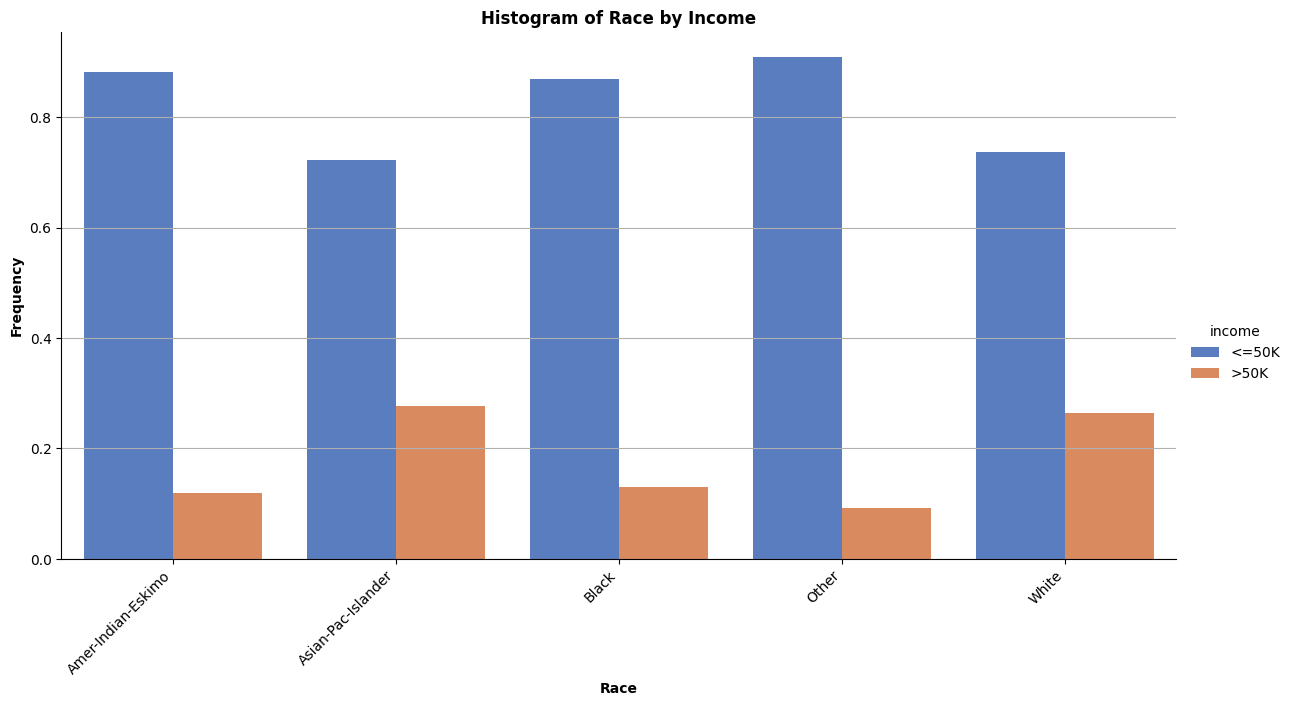

In [248]:
proportional_data = new_data.groupby(['race', 'income']).size().reset_index(name='count')
total_counts = proportional_data.groupby('race')['count'].transform('sum')
proportional_data['count'] = proportional_data['count'] / total_counts

plt.figure(figsize=(14, 8))
sns.catplot(data=proportional_data, x='race', y='count', hue='income', kind='bar', height=6, aspect=2, palette='muted')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Race', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Histogram of Race by Income', fontweight='bold')
plt.grid(axis='y')

plt.show()

In [249]:
new_data['race'] = new_data['race'].replace({ 'Amer-Indian-Eskimo': 'Other' })

print(new_data['race'].value_counts())

race
White                 25903
Black                  2812
Asian-Pac-Islander      894
Other                   517
Name: count, dtype: int64


Si potrebbe pensare di unire anche 'Black' con la nuova 'Other' ma ciò non sarebbe conveniente dato che la razza 'Black' è presente in un numero molto più elevato di istanze rispetto a 'Amer-Indian-Eskimo' che è quasi una minoranza etnica. Allo stesso modo si potrebbe pensare di unire 'Asian-Pac-Islander' con 'White', tuttavia si è deciso di lasciarla almeno in questa prima fase di pre-processing.

### Permutazioni e campionamento casuale

In generale, i dataset possono essere caratterizzati da un ordinamento ben preciso, e questo comporta errori nella regressione o classificazione. Per risolvere questa problematica si effettua una permutazione delle tuple.

In [250]:
import numpy as np

np.random.seed(42)
data_1 = new_data.copy()

In [251]:
new_data = data_1.sample(frac=1, random_state=42).reset_index(drop=True)
new_data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,<=50K,>50K,capital_variation
0,54,Gov,279881,11,Married-civ-spouse,Transport-moving,Husband,Black,Male,40,United-States,<=50K,True,False,0.0
1,43,Private,243380,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K,True,False,0.0
2,27,Gov,271243,10,Without-spouse,Adm-clerical,Other,Black,Male,40,others,<=50K,True,False,0.0
3,22,Gov,289982,13,Never-married,Prof-specialty,Other,White,Female,35,United-States,<=50K,True,False,0.0
4,40,Private,48612,9,Never-married,Adm-clerical,Other,Black,Female,35,United-States,<=50K,True,False,0.0


### Analisi varie

Sarebbe interessante vedere come, a parità di livello di educazione raggiunta, come varia l'occupazione al variare dell'età. E' forse possibile che, essendo più giovani, è possibile raggiungere delle occupazioni più meritevoli rispetto ad essere più grandi?

Sarebbe altrettanto interessante vedere come, a parità di educatione, è possibile raggiungere occupazioni più meritevoli.
Oppure se l'educazione incide effettivamente sulle occupazioni che è possibile raggiungere.
Oppure se avere un'alta educazione consente di raggiungere occupazioni più alte ma in meno tempo rispetto ad avere un'educazione più bassa.


Iniziamo per prima cosa a visualizzare le varie distribuzioni per cercare di capire come variano.

<Axes: xlabel='age', ylabel='Count'>

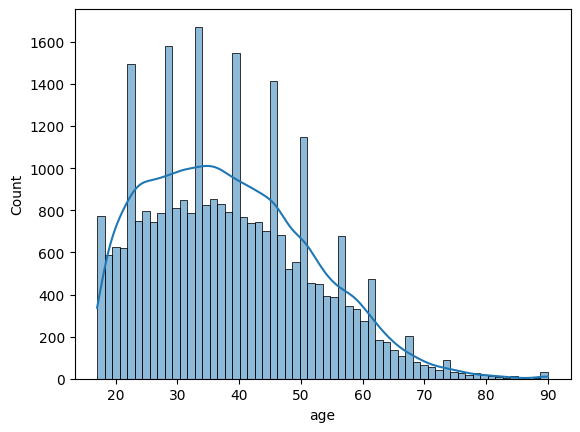

In [191]:
import seaborn as sns
sns.histplot(new_data['age'], kde=True)

Questo plot è abbastanza verosimile dal momento che, in genere, sono poche le persone che continuano a lavorare in tarda età, considerando che l'età media di pensionamento negli Stati Uniti è 62 anni.

In [192]:
value_counts = new_data['workclass'].value_counts().reset_index()
fig = px.bar(value_counts, x='workclass', y='count', title=f'Workclass')
fig.show()

La maggior parte delle persone lavora nel privato, quasi 2500 lavorano per se stessi, ma non hanno una propria struttura aziendale come una società. Il resto lavora nel governo locale (ruoli all'interno delle amministrazioni comunali, provinciali, ecc.), nel governo statale, possiede e gestisce la propria impresa (lavoro prevalentemente proprio e senza vincolo di subordinazione nei confronti di un committente), ed infine nel governo federale. Solo 14 dei lavoratori presenti nel dataset lavora senza essere pagato.

In [193]:
value_counts = new_data['education.num'].value_counts().reset_index()
fig = px.bar(value_counts, x='education.num', y='count', title=f'Education.num')
fig.show()

Questa feature rappresenta il numero di anni impiegati per raggiungere il livello di istruzione rappresentato precedentemente.

In [194]:
value_counts = new_data['marital.status'].value_counts().reset_index()
fig = px.bar(value_counts, x='marital.status', y='count', title=f'Marital.status')
fig.show()

La categoria “married-civ-spouse” si riferisce allo stato civile di una persona che è sposata e il coniuge è un civile, cioè non fa parte delle forze armate o non è un coniuge assente per motivi come il servizio militare. La categoria “married-AF-spouse” invece, fa riferimento a persone sposate con un coniuge che è nelle Forze Armate. La categoria “married-spouse-absent” si riferisce allo stato civile di una persona che è legalmente sposata, ma il coniuge è assente.

In [195]:
value_counts = new_data['occupation'].value_counts().reset_index()
fig = px.bar(value_counts, x='occupation', y='count', title=f'Occupation')
fig.show()

“Prof-speciality” si riferisce a professioni che richiedono un alto livello di specializzazione e competenza, come medici, avvocati, ingegneri, scienziati e professori universitari. “craft-repair” si riferisce a mestieri e lavori di riparazione. Ad esempio, potrebbe includere elettricisti, idraulici, meccanici, falegnami e altri mestieri simili. “exec-managerial” si riferisce a ruoli di gestione esecutiva e manageriale, come direttori generali, direttori di dipartimento, manager di progetto e altri ruoli simili. “adm-clerical” si riferisce a una categoria di professioni che include ruoli amministrativi e di segreteria, come impiegati, assistenti amministrativi, segretari e altri ruoli simili. “sales” si riferisce a ruoli che riguardano la vendita di prodotti o servizi. Ad esempio, potrebbe includere venditori, rappresentanti di vendita, direttori delle vendite e altri ruoli simili.  “machine-op-inspct” si riferisce a una categoria di professioni che include operatori di macchine e ispettori. “protective-serv” si riferisce a ruoli nel settore dei servizi di protezione, come poliziotti, vigili del fuoco, guardie di sicurezza e altri ruoli simili.  “priv-house-serv” si riferisce a una categoria di professioni che include ruoli di servizio domestico privato, come governanti, cuochi privati, maggiordomi e altri ruoli simili.

In [196]:
value_counts = new_data['relationship'].value_counts().reset_index()
fig = px.bar(value_counts, x='relationship', y='count', title=f'Relationship')
fig.show()

In [197]:
value_counts = new_data['sex'].value_counts().reset_index()
fig = px.bar(value_counts, x='sex', y='count', title=f'Sex')
fig.show()

Sciuramente il plot è concorde con quello precedente in cui la percentuale di "husband" è nettamente superiore a quella di "wife".

In [198]:
import plotly.express as px
import pandas as pd

value_counts = new_data['hours.per.week'].value_counts().reset_index()
value_counts.columns = ['hours.per.week', 'count']
value_counts = value_counts.sort_values(by='hours.per.week')

fig = px.bar(value_counts, x='hours.per.week', y='count', title='Hours.per.week')
fig.update_layout( yaxis_type="log", xaxis_title='Ore per settimana', yaxis_title='Conteggio (scala logaritmica)', bargap=0.5)
fig.show()


In [199]:
value_counts = new_data['native.country'].value_counts().reset_index()
fig = px.bar(value_counts, x='native.country', y='count', title=f'Distribution of Native.country')
fig.show()

In [200]:
value_counts = new_data[['<=50K', '>50K']].sum().reset_index(name='Count')
fig = px.bar(value_counts, x='index', y='Count', color='index',
             title='Distribution of Income', text='Count')

fig.show()

Si nota come il dataset risulta essere nettamente sbilanciato dal momento che le feature con income '<=50K' sono il 75% di quelle totali.

### Analisi interazioni tra feature

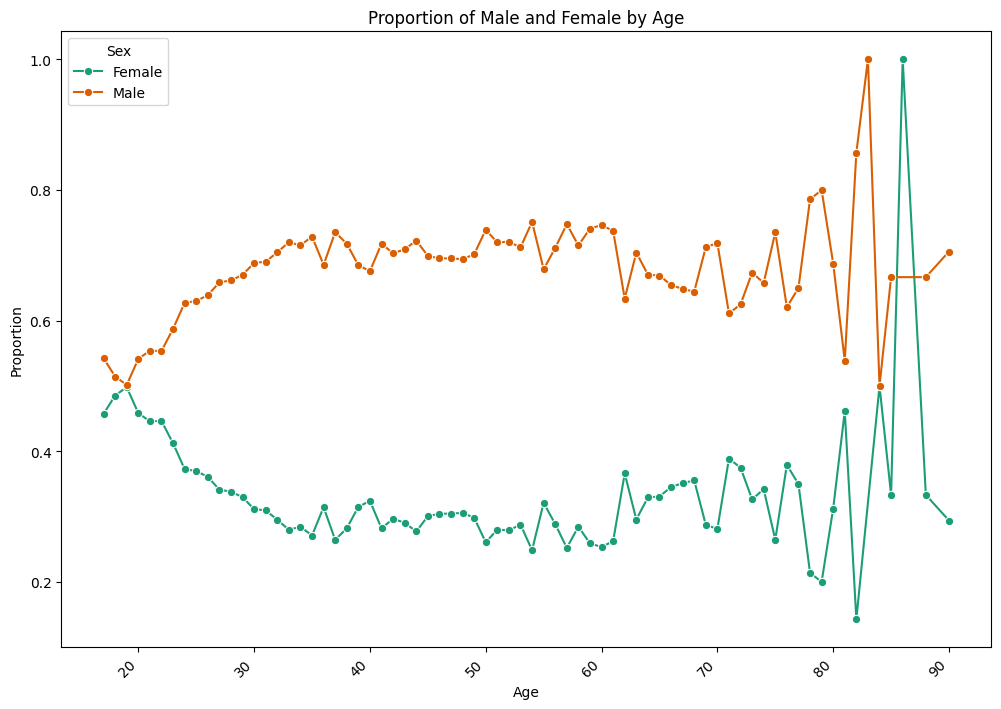

In [201]:
# @title sex vs age

from matplotlib import pyplot as plt
import seaborn as sns

proportional_data = new_data.groupby(['age', 'sex']).size().reset_index(name='count')
total_counts_per_age = proportional_data.groupby('age')['count'].transform('sum')
proportional_data['count'] = proportional_data['count'] / total_counts_per_age

plt.figure(figsize=(12, 8))
sns.lineplot(data=proportional_data, x='age', y='count', hue='sex', marker='o', palette='Dark2')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Proportion of Male and Female by Age')
plt.legend(title='Sex')
plt.xticks(rotation=45, ha='right')
plt.show()

Sicuramente possiamo affermare che dopo i 20 anni, la percentuale di uomini che lavora si mantiene in vantaggio rispetto a quella delle donne.

Sarebbe interessante capire quali sono i lavori svolti dalle persone over 70 dal momento che l'età media di pensionamento negli USA è attorno ai 62.

In [202]:
filtered_data = new_data[new_data['age'] > 70]

proportional_data = filtered_data.groupby(['occupation', 'workclass']).size().reset_index(name='count')
total_counts_per_occupation = proportional_data.groupby('occupation')['count'].transform('sum')
proportional_data['count'] = proportional_data['count'] / total_counts_per_occupation

fig = px.bar(proportional_data,
             x='occupation',
             y='count',
             color='workclass',
             title='Distribuzione delle Occupazioni per Persone con Età > 70 in base a Workclass',
             barmode='group')  # barmode='group' per barre raggruppate

fig.update_layout( xaxis_tickangle=-45, bargap=0.2)
fig.show()

Sicuramente i lavori che permettono ad un individuo di rimanere a lavorare oltre l'età media di pensionamento rigurdano il settore privato, e in particolare,"prof-speciality" e "adm-clarical" che per l'appunto sono lavori più "stazionari" dato che non richiedono alcuna particolare capacità fisica. Altri lavori più manuali come "craft-repair" o addirittura "protective-serv" hanno un conteggio molto basso come ci aspettavamo.  

In [203]:
education_income_counts = new_data.groupby(['education.num', 'income']).size().reset_index(name='count')
fig = px.bar(education_income_counts,
             x='education.num',
             y='count',
             color='income',
             title='Distribuzione di Income in base a Education.num',
             barmode='group')

fig.update_layout(xaxis_title='Livello di istruzione', yaxis_title='Conteggio', xaxis_tickangle=-45)
fig.show()

## One Hot Encoding

Per la gestione delle variabili categoriche si è deciso di fare uso di un one-hot encoding. Altre strategie che richiedono l'assegnamento di una sequenza di interi alle varie categorie risultano essere poco ottimali dal momento che stabiliscono un ordinamento tra le varie categorie, un'operazione priva di senso nel nostro caso.

In [204]:
categorical_columns = new_data.select_dtypes(include=['object']).columns
#new_data = pd.get_dummies(new_data, columns=categorical_columns)


## Analisi correlazione

In [205]:
new_data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,<=50K,>50K,capital_variation
0,48,Private,287480,14,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,False,True,0.0
1,29,Private,308944,9,Married-spouse-absent,Craft-repair,Not-in-family,White,Male,40,United-States,<=50K,True,False,0.0
2,17,Private,153035,6,Never-married,Sales,Own-child,White,Female,20,United-States,<=50K,True,False,0.0
3,18,Private,36162,7,Never-married,Craft-repair,Own-child,White,Male,5,United-States,<=50K,True,False,0.0
4,45,Self-emp-inc,311231,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,>50K,False,True,-742.5


In [206]:
corr_matrix = new_data.corr()
corr_matrix["income_<=50K"].sort_values(ascending=False)

ValueError: could not convert string to float: 'Private'

In [ ]:
corr_matrix = new_data.corr()
corr_matrix["income_>50K"].sort_values(ascending=False)